In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')

# Display the first 5 rows as a full table
print("First 5 rows of the dataset:")
display(df.head())

# Get information about the columns and data types
print("\nDataset Info:")
df.info()

# Get summary statistics for all columns in full table format
print("\nDescriptive Statistics:")
display(df.describe(include='all').transpose())  # transpose for better readability


First 5 rows of the dataset:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB

Descriptive Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s8807,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Zubaan,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Drop rows where 'director' and 'listed_in' are missing, as they are key features
df = df.dropna(subset=['director', 'listed_in'])

# Fill missing values in 'country' with 'Unknown'
df['country'] = df['country'].fillna('Unknown')

# Clean spaces and convert 'date_added' safely
df['date_added'] = df['date_added'].astype(str).str.strip()   # force to string, then strip
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')  # convert safely

# Extract 'year_added'
df['year_added'] = df['date_added'].dt.year

# Create a 'genre' column (take first genre only)
df['genre'] = df['listed_in'].apply(lambda x: x.split(',')[0].strip())

print("\nMissing values after cleaning:")
print(df.isnull().sum())





Missing values after cleaning:
show_id           0
type              0
title             0
director          0
cast            473
country           0
date_added        0
release_year      0
rating            1
duration          3
listed_in         0
description       0
year_added        0
genre             0
dtype: int64


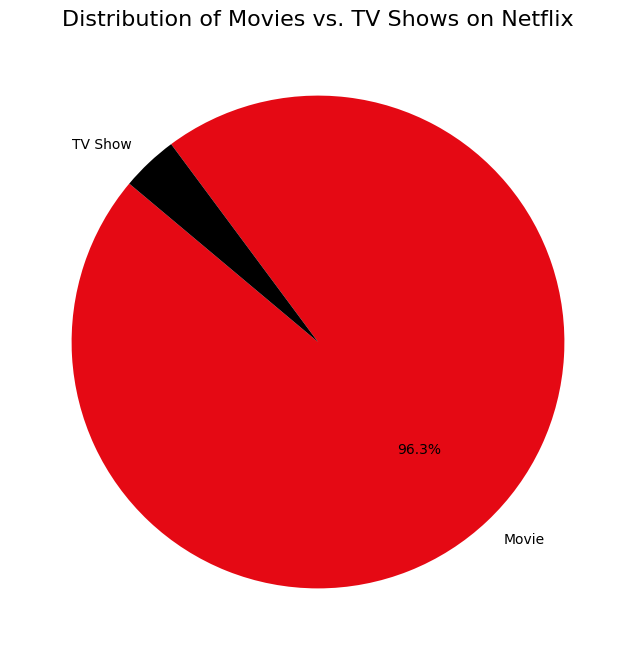

In [8]:
# 4. Count Movies vs TV Shows
type_counts = df['type'].value_counts()

# 5. Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts,
        labels=type_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=['#e50914', '#000000'])
plt.title('Distribution of Movies vs. TV Shows on Netflix', fontsize=16)
plt.show()



/tmp/ipython-input-3914406163.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')


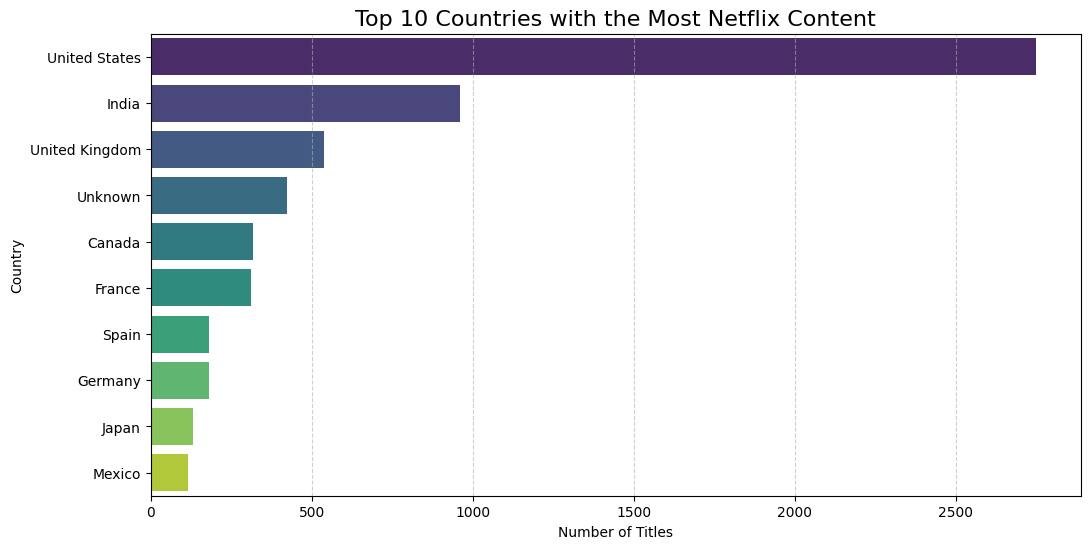

In [9]:
# Split and count countries, handling multiple countries per title
country_counts = df['country'].str.split(',').explode().str.strip().value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Top 10 Countries with the Most Netflix Content', fontsize=16)
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

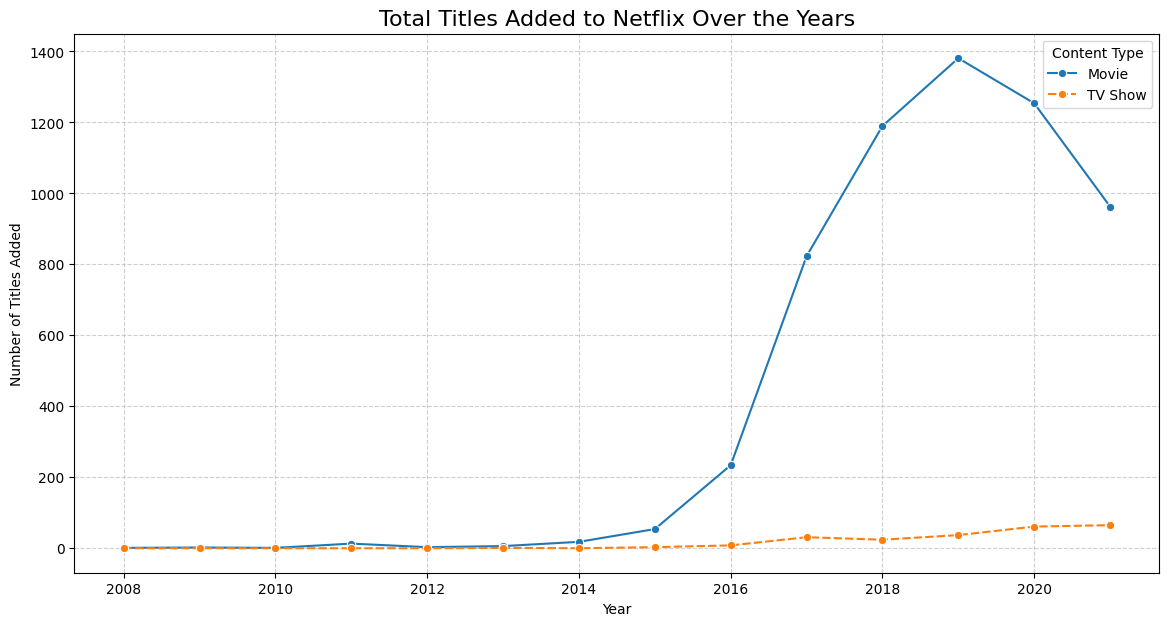

In [10]:
# Group data by 'year_added' and 'type' and count titles
content_over_time = df.groupby('year_added')['type'].value_counts().unstack().fillna(0)

# Create a line plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=content_over_time, marker='o')
plt.title('Total Titles Added to Netflix Over the Years', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Content Type')
plt.show()

/tmp/ipython-input-4267138044.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_counts.values, y=director_counts.index, palette='magma')


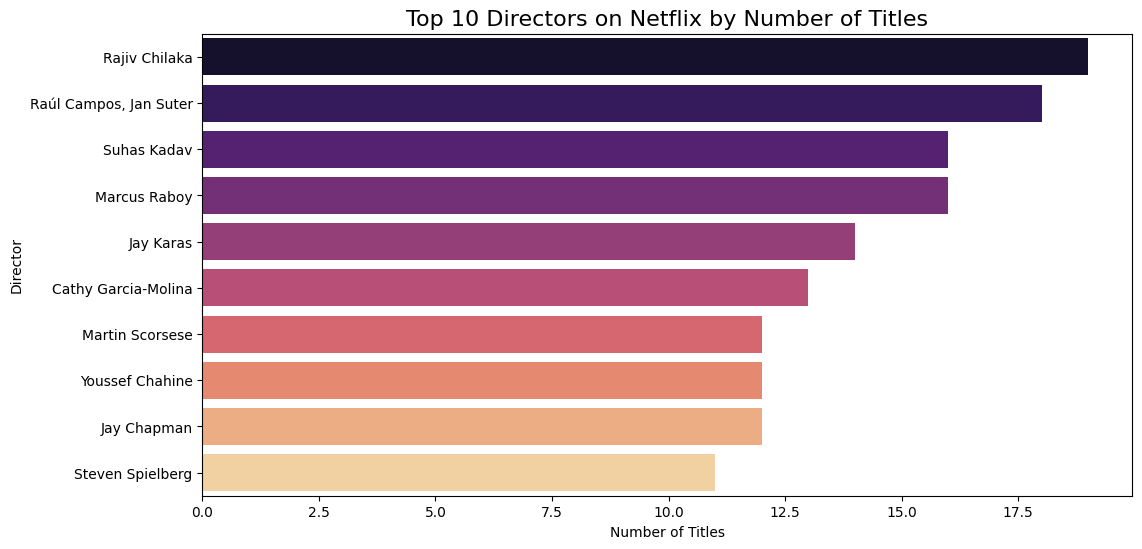

In [11]:
# Count the number of titles per director
director_counts = df['director'].value_counts().head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=director_counts.values, y=director_counts.index, palette='magma')
plt.title('Top 10 Directors on Netflix by Number of Titles', fontsize=16)
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

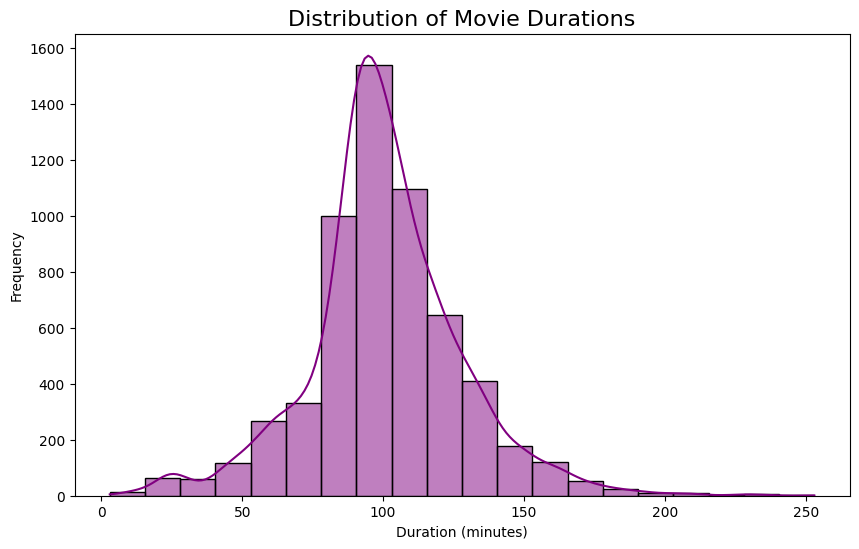

In [13]:
# Filter for movies only
movies_df = df[df['type'] == 'Movie'].copy()

# Extract duration as integer safely
movies_df['duration_int'] = (
    movies_df['duration']
    .str.extract(r'(\d+)')        # use raw string r'(\d+)' to avoid warnings
    .astype(float)                # convert to float first (NaN safe)
)

# Drop rows with missing duration if needed
movies_df = movies_df.dropna(subset=['duration_int'])

# Convert to integer finally
movies_df['duration_int'] = movies_df['duration_int'].astype(int)

# Create a histogram
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['duration_int'], bins=20, kde=True, color='purple')
plt.title('Distribution of Movie Durations', fontsize=16)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()
